# Машинное обучение. Введение
При рассмотрении ИИ, было установлено два основополагающих подхода (нисходящий и восходящий), на их стыке находится машинное обучение, которое работает непосредственно с данными, и устанавливает между ними взаимосвязи.

Машинное обучение извлекает знания из данных. МО может работать не только с нейронными сетями, но и с более простыми алгоритмами.

Ссылки: [Весь код из примеров ниже](https://github.com/shwars/ai_course/blob/main/02-MLExpress/ExpressML.ipynb)

## Машинное обучение и Программирование

МО часто сравнивают с классическим программированием, поскольку процесс написания и построения программы чем-то похожи, только на выходе в случае программирования мы получаем какой-то абстрактный результат, а в случае МО, мы получаем программу.

![Сравнение МО и программирования](https://i.imgur.com/ZEksKMx.png)


## Машинное обучение.
На картинке ниже представлены компоненты, из которых строится программа МО.

![Процесс создания программы МО](https://i.imgur.com/hFeUOBD.png)

Полученная программа - модель проверяется на качество обучения. Для этого используется тестовый датасет (важно, чтобы он не был включён в обучающий датасет).

![Проверка модели](https://i.imgur.com/Jl8iwDV.png)

## Машинное обучение. Инструменты статистики.

Перед написанием модели, зачастую приходится проанализировать датасет, для этого можно использовать различные инструменты, от Python, до Excel.

Например, в Excel для этого очень удобно использовать сводные таблицы, в Python - numpy, pandas.

## Машинное обучение. Задачи

Обучение с учителем. Существует обучающая выборка, в которой есть набор параметров и ответ на интересующий нас запрос.
Примеры:
- Регрессия (нахождение значения на основе параметров)
- Классификация (определение класса объекта по параметрам)


Обучение без учителя. Обучающей выборки не существует, есть лишь представление об обработке тех или иных параметров, после чего модель при поступлении данных начнётся постепенно обучаться на них, создавая и совершенствуя правила обработки.

Примеры: 
- Кластеризация (группировка похожих объектов по определённым параметрам)
- Обучение с подкреплением (обучение на самом себе, отбрасывая неудачные попытки). Пример - обучение игре в шахматы.

![Задачи МО](https://i.imgur.com/0HyDL74.png)

## Машинное обучение. Пример предсказания стоимости билета на поезд.

Рассмотрим пример машинного обучения задачи регрессии. Посмотрим, что используется в нашей обучающей выборке.

X - признаки, от которых зависит искомое значение (параметры). В нашем случае расстояние, класс билета, время в пути.
Y - искомое значение - то, что мы непосредственно хотим научиться прогнозировать. В нашем случае это стоимость билета.

Признаки бывают числовыми и категориальными (те, что выражены словами).

![Описание обучающей выборки](https://i.imgur.com/ehkoV9Q.png)

Для числового признака (расстояния) можно построить график зависимости цены от расстояния. После чего провести апроксимирующую прямую (которая усредняет значения набора точек). После чего, для прогноза цены билета с любым расстоянием, можно провести линию к этой прямой и оттуда к оси цены и получить прогноз.

![График одного числового признака](https://i.imgur.com/ulAAqVj.png)

## Машинное обучение. Математика регрессии. Простейший случай

Наша модель имеет линейную формулу (aX + b).
Ошибка - расстояние (разница) между фактическим значением искомого параметра и значением, полученным с помощью апроксимации. Ошибка L(a, b) - сумма всех расстояний.

Задача - подбор параметров a, b таких, что ошибка будет минимальной

![Пример регрессии и ошибки на графике](https://i.imgur.com/3mCK56b.png)

## Метод наименьших квадратов.

Для вычисления ошибки зачастую используется метод наименьших квадратов, где высчитываются все квадраты отклонений, после чего берётся 0 производной и вычисляются параметры a, b.

![Метод наименьших квадратов 1](https://i.imgur.com/KXjPyMU.png)

Вычисление параметров имеет следующие формулы для одномерного и многомерного случаев:

![Метод наименьших квадратов 2](https://i.imgur.com/s2n8E9E.png)

## Машинное обучение. Практика на Python. Предсказание стоимости билета на поезд.

Будем использовать датасет с информацией о билетах в Европе. В датасете присутствует расстояние между городами, точки отправки и назначения, тип вагона, тип билета, время в пути, кол-во пассажиров и т.д. На его примере разберём, как строится модель для машинного обучения и прогнозирования цены билета от нескольких факторов.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree

In [5]:
df = pd.read_csv("./data/renfe-rail-sample.zip", compression='zip')

Разобьём датасет на обучающую и тестовую выборку. `train_size` отвечает за процент данных для обучающей выборки от всего датасета.

In [6]:
df_train, df_test = sk.model_selection.train_test_split(df, train_size=0.8)

Начнём прогнозирование одного параметра (расстояния). Изобразим график:

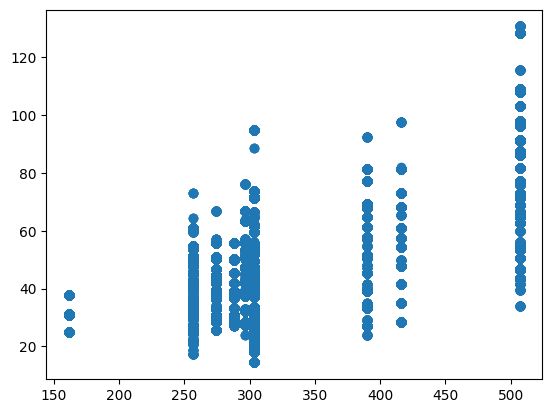

In [7]:
X = df_train["geodistance"]
Y = df_train["price"]

plt.scatter(X, Y)
plt.show()

Для нахождения коэффицентов `a`, `b` используем метод наименьших квадратов (см. выше).

In [8]:
n = len(X)
a = (X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()*X.sum()-n*(X*X).sum())
b = (Y.sum()*(X*X).sum()-X.sum()*(X*Y).sum())/(X*X).sum()/(n-X.sum())
print(f"a={a}, b={b}")

a=0.15121797610416662, b=-0.0006865346753568554


Построение апроксимирующей прямой для одного называется линейной регрессией. Для большего кол-ва параметров, используются многомерные апроксимирующие плоскости (их вычисление так же было приведено выше).

Построим её на предыдущем графике:

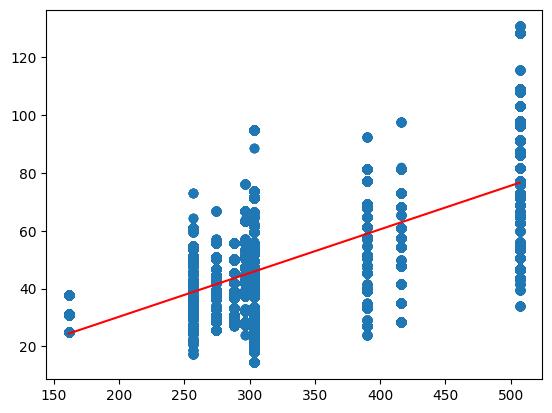

In [9]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

## Подсчёт ошибки.

Будем высчитывать ошибку на тестовой выборке. Для этого существуют следующие алгоритмы:
- Среднеквадратичное отклонение (MSE)
- Средняя (абсолютная) ошибка (MAE)
- Относительная средняя ошибка. Показатель ошибки в процентах относительно среднего значения целевой величины.

![Ошибки на тестовой выборке](https://i.imgur.com/EzeEKJm.png)

In [10]:
X_t, Y_t = df_test["geodistance"], df_test["price"]

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(a*X_t+b,Y_t))}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")

MSE=16.28903772886216, MAE=13.608479243396332, MAE(%)=0.2851161271185836


## Оптимизация обучения модели. Метод градиентного спуска

Среднее квадратичное отлично работает для малых и средних размерностей. Но если размерность большая или функция ошибки является сложной, то прибегают к оптмизационным численным способам нахождения параметров `a`, `b`.

Численный метод зависит от обучающего датасета и некого параметра Тэта. После чего вычисляем предсказание, зависящее от параметров и Тэта, вычисляем ошибку и подбираем Тэта так, чтобы минимизировать ошибку.

По сути, это численная задача нахождения экстремума функции ошибки (минимума), у этой задачи есть множество алгоритмов решений, рассмотрим метод градиентного спуска.

![Минимизация ошибки](https://i.imgur.com/siDIhNj.png)

![Метод градиентного спуска](https://i.imgur.com/zZIztIr.png)

P.S. Значение шага Тета необходимо подбирать опытным путём, пока ошибка не станет уменьшаться.

In [11]:
a,b = np.random.normal(size=2)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(a*X+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((a*X+b-Y)*X).mean(), b-eta*(a*X+b-Y).mean()

Epoch 0: MSE=9624.427361005353
Epoch 1: MSE=2556.284800050102
Epoch 2: MSE=824.9477379071926
Epoch 3: MSE=400.85781613821257
Epoch 4: MSE=296.9772567670415
Epoch 5: MSE=271.5317787209542
Epoch 6: MSE=265.29892436708013
Epoch 7: MSE=263.77219006691945
Epoch 8: MSE=263.39821690520466
Epoch 9: MSE=263.3066118571691


Выведем прямую из коэффицентов, полученных методом градиентного спуска.

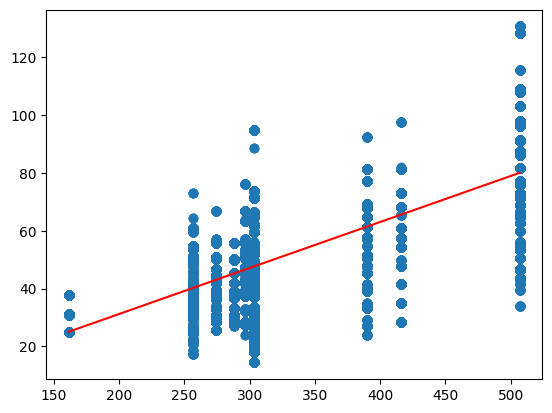

In [12]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Добавим ещё численных параметров.

Используем векторное уможение, в качестве коэффицента a используется массив коэффицентов.

In [13]:
X = df_train[["geodistance","duration","departure_hour"]]
X_t = df_test[["geodistance","duration","departure_hour"]]

*a, b = np.random.normal(size=4)
a = np.array(a)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=160233.0102917133
Epoch 1: MSE=39359.890304692264
Epoch 2: MSE=9850.158420302514
Epoch 3: MSE=2645.696952284019
Epoch 4: MSE=886.7985168641665
Epoch 5: MSE=457.3686911112841
Epoch 6: MSE=352.51261458257153
Epoch 7: MSE=326.8973146118477
Epoch 8: MSE=320.62770182359924
Epoch 9: MSE=319.08111179241206


In [14]:
a, b

(geodistance       0.183632
 duration          0.579836
 departure_hour   -0.770916
 dtype: float64,
 -0.4782704175137246)

Средняя абсолютная ошибка:

In [15]:
np.mean(np.abs(X_t@a + b - Y_t))

15.130545494914111

## Машинное обучение. Признаки.

Рассмотрим, какие признаки бывают:

Числовые:
- Непрерывные (возраст, рост). С таким типом мы только что работали.
- Дискретные (количество детей)

Категориальные:
- Порядковые (оценка). Такой признак можно интерпретировать, как числовой, совершив подмену признака на цифру по возрастанию.
- Номинальные (цвет, класс)

Преобразование признаков к числовым:
![Преоборазование признаков к числовым](https://i.imgur.com/6Wy7T0H.png)

One-Hot Encoding - запись признака вектором значений, в котором один из элементов единица, а все остальные - нули. 4
Например, имеем красный цвет, всего дано 6 цветов, получим вектор, из 5 нулей и единичкой в индексе, который отвечает за красный цвет.

P.s. Пример с цветов является показательным, но не совсем верным, для цвета чаще всего используется приведение к RGB формату.


Бывают задачи, когда необходимо перейти от числовых признаков к категориальным. В таком случае непрерывные величины подвергаются дискретизации - определённые интервалы значений формируют группы (категории), их число должно быть конечно. Например, для возраста будут использоваться возрастные категории (молодой, старый и т.д.) 

## Категориальные признаки. Практический пример.

Изучим типы билетов:

In [ ]:
df["fare"].values.counts()

Отобразим среднюю цену по тарифу:

In [ ]:
df.groupby('fare').mean()['price'].plot(kind='bar')

По информации из графика, можно сказать, что признак можно интерпретировать, как порядковый, так и номинальный, такой параметр можно представить с помощью:
- One-Hot Encoding.
- Label Encoding (приводит уникальные значения к соответсвующим численным значениям). Используется для порядковых.

P.S. (Другие варианты кодирования символьных признаков)[https://habr.com/ru/articles/666234/]

Используем One-Hot Encoding. В Pandas для этого существует специальная функция `get_dummies`.

In [16]:
pd.get_dummies(df['fare'])

,Adulto ida,Flexible,Promo +
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1246671,False,False,True
1246672,False,True,False
1246673,False,True,False
1246674,False,True,False


Добавим в таблицу признаков кодирование тарифа с помощью One-Hot Encoding и проведём привычный нам поиск коэффицентов и ошибки:

In [19]:
X = pd.get_dummies(df_train,columns=["fare"])[['geodistance','fare_Adulto ida','fare_Promo +','fare_Flexible']]
X

,geodistance,fare_Adulto ida,fare_Promo +,fare_Flexible
859508,256.506445,False,False,True
582789,161.318295,True,False,False
121664,303.573264,True,False,False
406237,256.506445,False,True,False
1189133,303.573264,False,False,True
...,...,...,...,...
578623,274.364753,False,False,True
251161,274.364753,False,False,True
304553,161.318295,False,False,True
502966,274.364753,False,False,True


In [20]:
*a, b = np.random.normal(size=5)
a = np.array(a)
eta = 0.000005
for i in range(20):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=19887.393793036208
Epoch 1: MSE=5091.947438440385
Epoch 2: MSE=1467.8376911488724
Epoch 3: MSE=580.120203243682
Epoch 4: MSE=362.67547325988085
Epoch 5: MSE=309.41245679634613
Epoch 6: MSE=296.36535950358314
Epoch 7: MSE=293.16905570174754
Epoch 8: MSE=292.38568027618
Epoch 9: MSE=292.1933459010914
Epoch 10: MSE=292.1457856237944
Epoch 11: MSE=292.13368741894976
Epoch 12: MSE=292.1302755659457
Epoch 13: MSE=292.1289914151806
Epoch 14: MSE=292.1282284419896
Epoch 15: MSE=292.12759313111775
Epoch 16: MSE=292.1269890937318
Epoch 17: MSE=292.12639271804545
Epoch 18: MSE=292.1257982190011
Epoch 19: MSE=292.1252041832522


Изучив коэффицент `a`, можно узнать, как влияют на цену те или иные признаки. Из-за этого модель называется интерпретируемой.

In [21]:
a

geodistance        0.151522
fare_Adulto ida    1.768167
fare_Promo +       2.532001
fare_Flexible     -0.233743
dtype: object

## Машинное обучение. Scikit learn.

Библиотека SciKit learn является стандартом для работы в машинном обучении, в ней реализовано огромное количество алгоритмов, необходимых для работы с данными, а так же для обучения моделей. Выше был разобран метод градиентного спуска, однако на практике никто не реализует его с нуля или другие классические алгоритмы математики, для этого и создан данный пакет.

Рассмотрим, как работает SciKit Learn:

Для начала выделим численные и категориальные признаки:

In [23]:
numeric = ['geodistance', 'duration', 'departure_hour']
categorial = ['vehicle_type', 'vehicle_class', 'fare']

Обучим модель на численных признаках:

In [24]:
X = df_train[numeric]

model = sk.linear_model.LinearRegression()
model = model.fit(X, Y)

Самый важный метод, который отвечает за обучение - `fit`. Он подбирает наиболее оптимальные коэффиценты, дабы минимизировать ошибку - всё то, что мы делали ручками выше.

В SciKit Learn также реализованы различные методы вычисления ошибок, для примера вычислим точность на тестовой выборке:

In [25]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=223.047043937064, MAE=11.92652097189489, MAE(%)=0.2881864345816348


Ошибки в пакете SciKil Learn:
- mean_squared_error - средняя квадратичная ошибка
- mean_absolute_error - средняя абсолютная ошибка
- mean_absolute_percentage_error - абсолютная процентная ошибка

Коэффиценты, вычисленные моделью:
- coef_ - a
- intercept_ - b

In [ ]:
print(f"Coefficients={model.coef_} intercept={model.intercept_}")

Для кодирования признаков можно использовать объекты пакета SciKit Learn, они называются `*Encoder`. 
Для определения значений признаков используется `fit`. 
Для вывода информации о полученных значениях используется `categories_`.
Чтобы закодировать набор данных используется `transform`.

Пример использования энкодера:

In [ ]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[['fare', 'vehicle_class']])
print(ohe.categories_)
ohe.transform(df[['fare',   'vehicle_class']]).to_array()[:10]

Чтобы упростить работу с разными типами признаков, можно использовать механизм трансформеров:

In [ ]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(), ['fare']), 
    (sk.preprocessing.OneHotEncoder(), ['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_class']),
    remainder='passthrough'
)

X = transformer.fit_transform(df_train[numeric + categorial])

X.to_array()[:2]

Таким образом были получены обработанные входные данные, котрые можно использовать для обучения модели:

In [ ]:
model = sk.linear_model.LinearRegression()
model.fit(X,Y)
X_t = transformer.transform(df_test[numeric + categorial])
Y_t_pred = model.predict(X_T)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

Теперь, когда для обучения использовались все возможные признаки, точность предсказания кратно увеличилась. Однако остаётся ещё один способ увеличить точность прогнозирования - нормализация данных обучающей выборки.

## Нормализация значений.

Нормализация значений - масштабирование значений всех признаков к единому интервалу, поскольку OneHot Encoding использует интервал от 0 до 1, то имеет смысл подогнать все значения к этому интервалу.

Так же часто используются интервалы [-1; 1] или нормальное распределение с центром в 0.

В Sklearn для этого существуют два вида нормализации (используются внутри трансформера):
- MinMaxScaler - преобразует значения к диапазону 0-1 линейным способом
- StandartScaler - вычитает среднее и делит на дисперсию (нормально распределение) 

Применим их на практике:

# 